<a href="https://colab.research.google.com/github/whtnals135/Aiffel_Main_Quest/blob/main/Bonus_Quest_of_Main_Quest_02_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Quest 02 - Bonus Quest  

## DieTanic EDA

**1. 탐색적 데이터 분석(EDA) 부분**:  <br>  

특징들에 대한 분석: 데이터셋의 각 특징(컬럼)들에 대한 조사와 분석을 수행합니다.
다양한 특징을 고려한 관계나 추세 파악: 여러 특징들 간의 관계 또는 추세를 찾아내는 분석을 수행합니다.  
<br>  
<br>  

**2. 특성 공학 및 데이터 클리닝 부분**: <br>  

새로운 특징 추가: 기존 특징들을 기반으로 새로운 특징을 만들어내는 작업을 수행합니다.
불필요한 특징 제거: 모델에 불필요하거나 중복된 특징들을 제거합니다.
모델링을 위한 특징 변환: 모델 학습에 적합한 형태로 특징들을 변환합니다.  
<br>  
<br>  

**3. 예측 모델링 부분**: <br>  

기본 알고리즘 실행: 데이터셋에 기본적인 머신러닝 알고리즘을 실행하여 모델을 학습시키는 단계입니다.
교차 검증: 모델의 성능을 평가하기 위해 교차 검증을 수행합니다.
앙상블: 여러 모델을 결합하여 성능을 향상시키는 앙상블 기법을 적용합니다.
중요한 특징 추출: 모델에서 중요하게 여겨지는 특징을 추출하고 해석합니다.

---


In [5]:

### Part 1 : EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('/content/sample_data/train (1).csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### <컬럼이 뜻하는 내용>  
<br>  

1. Survived (생존 여부): 0 또는 1로 표현, 0은 사망, 1은 생존.int  

2. Pclass (승선 등급): 1, 2, 3 중 하나로 표현. 1이 최상위 등급. int  

3. Name (이름): 승객의 이름. str  

4. Sex (성별): 남성 또는 여성으로 표현. str  

5. Age (나이): 승객의 나이. float  

6. SibSp (동승한 형제자매/배우자 수): 정수값으로 표현. int  

7. Parch (동승한 부모/자녀 수): 정수값으로 표현. int  

8. Ticket (티켓 번호): 승객의 티켓 번호. str  

9. Fare (요금): 승객이 지불한 요금. float  

10. Cabin (객실 번호): 승객의 객실 번호. str  

11. Embarked (승선 항구): C, Q, S 중 하나로 표현. str  

In [7]:
# 결측치 확인하여 제거하기
data.isnull().sum()
data = data.dropna()
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


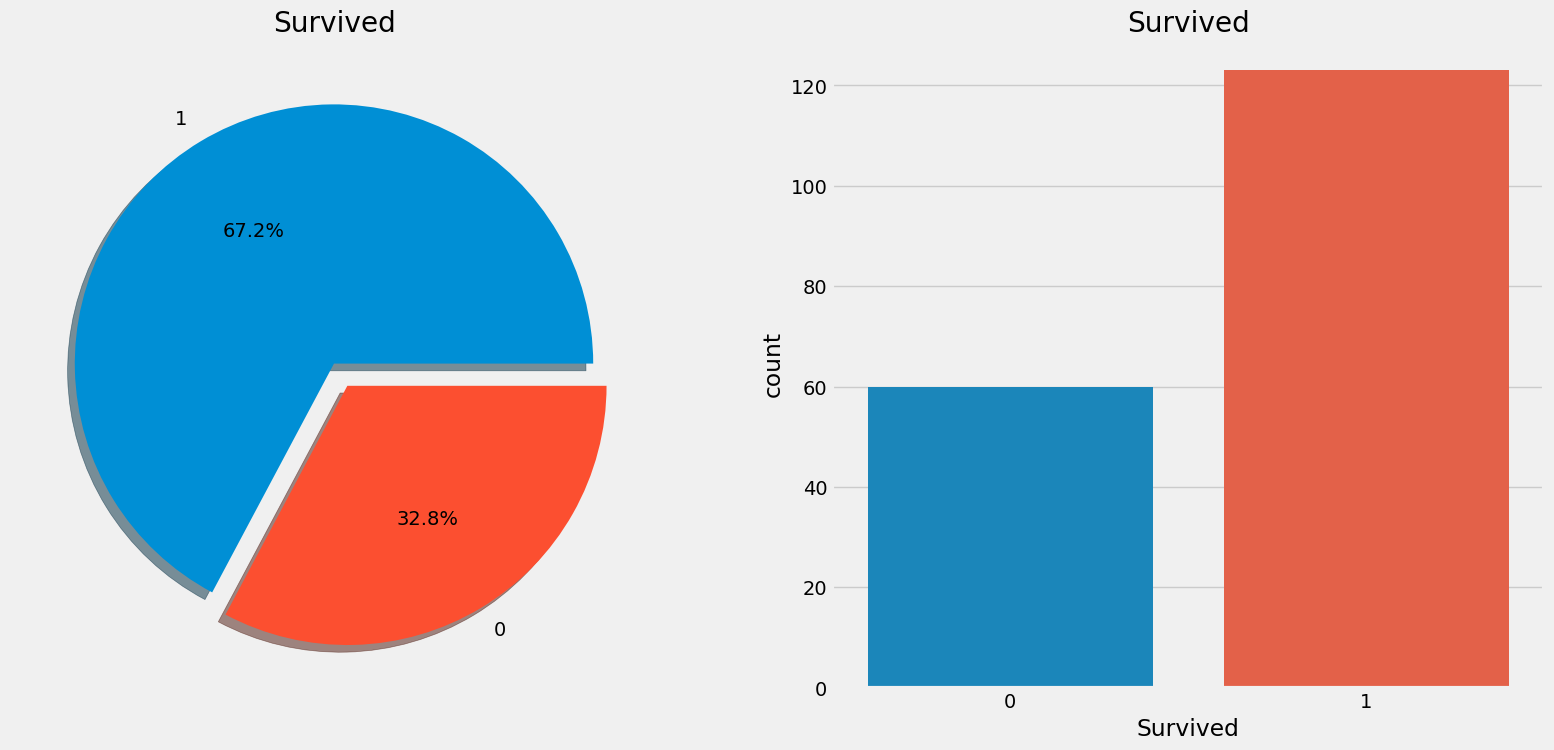

In [9]:
# 생존자는 얼마나 있었는가?
# 그래프로 나타내어 보자
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived',data=data,ax=ax[1])  # countplot 함수에 data라는 인자를 중복해서 전달하지 않게 조심하기!
ax[1].set_title('Survived')
plt.show()

**위 그래프를 통해 알 수 있는 내용은?**  
<br>  
- 배에 탑승한 남성의 수가 여성보다 많다.
- 생존한 여성의 수는 생존한 남성의 거의 2배이다.
- 여성의 생존율은 약 75%로, 남성의 생존율은 약 18-19% 정도이다.

<br>  
<br>  

---  

### Pclass(승객의 등급)과 Survived(생존 여부) 간의 관계

In [10]:
# 히트맵으로 시각화 해보기
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,52,106,158
2,3,12,15
3,5,5,10
All,60,123,183


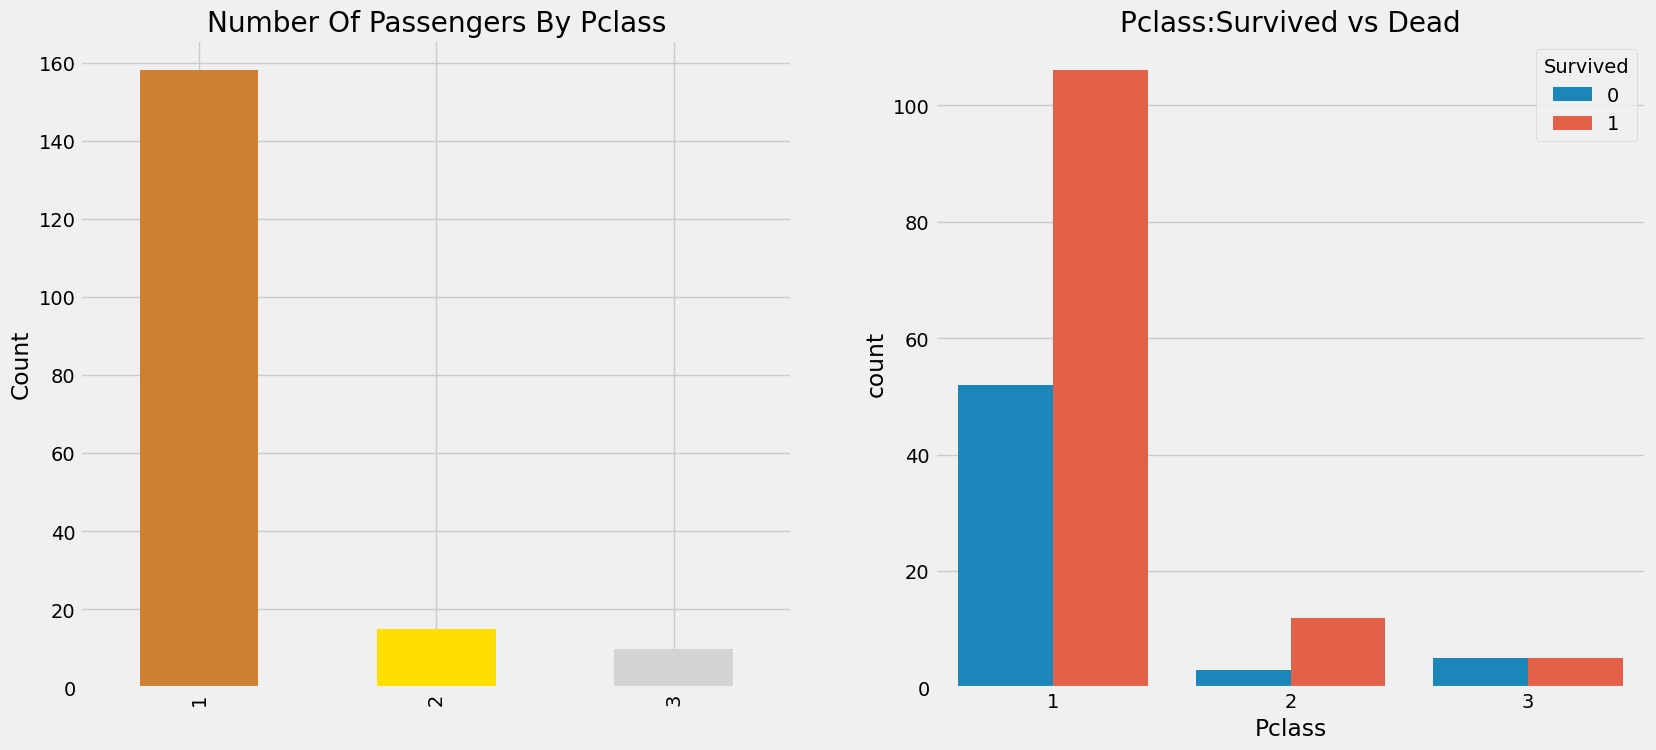

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

**위 그래프를 통해 알 수 있는 내용은?**  
<br>  
- 1등급 승객의 생존율은 약 63%이고, 2등급은 약 48%이다.
- 3등급 객실에 있는 승객의 수가 더 많지만 그들의 생존률은 매우 낮다.
- 돈과 지위가 생존에 큰 영향을 미쳤던 것 같다.


<br>  
<br>  

---  

### Sex(성별)과 Pclass(객실 등급) 간의 관계  
< 성별과 객실 등급을 함께 고려한 생존율 >

In [13]:
# 히트맵으로 시각화 해보기
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

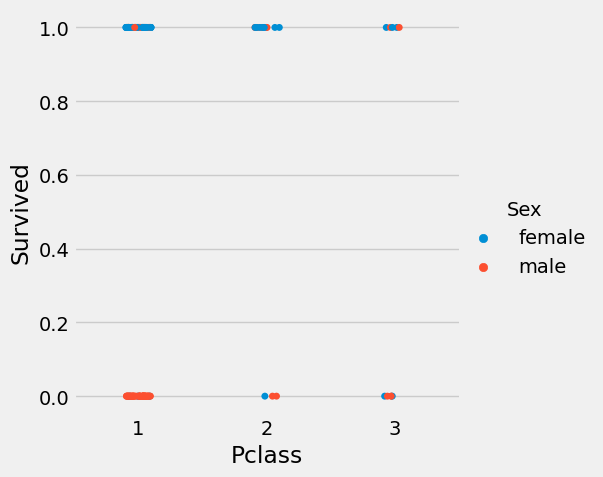

In [17]:
# sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data)
# plt.show()

#그래프가 이상하다...
#factorplot 은 Seaborn 버전이 업데이트되면서 없어졌다고 했는데... 좀 더 찾아봐야겠다.